<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_k_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# импорт библиотек
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# загрузка данных, столбец target не грузим!
iris = datasets.load_iris()
data = iris.data

In [23]:
# размер фрейма
data.shape

(150, 4)

In [24]:
# проверим что загружено
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [25]:
# стандартизация признаков со средним 0 и std 1
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [26]:
# создание экземпляра кластеризатора
cluster = KMeans(n_clusters=3,     # 3 кластера
                 init='k-means++',  # улучшенный алгоритм
                 random_state=42,   # зерно
                 n_jobs=-1)         # кол-во ядер процессора

In [27]:
# обучение модели
model = cluster.fit(data_std)

In [28]:
# вывод меток после кластеризации
model.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [29]:
# вывод центров кластеров - три точки в 4-х мерном пространстве
model.cluster_centers_[:5]

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

Класс MiniBatchKMeans работает аналогично KMeans, но  с  одним  существен­ным отличием: это параметр размера пакета batch size. 

Параметр batch size управ­ляет количеством случайно отбираемых наблюдений в каждом пакете. Чем больше размер пакета, тем более дорогостоящим является тренировочный процесс.

In [30]:
# импорт класса
from sklearn.cluster import MiniBatchKMeans

In [31]:
cluster = MiniBatchKMeans(n_clusters=3,      # 3 кластера
                          init='k-means++',  # улучшенный алгоритм
                          random_state=42,   # зерно
                          batch_size=100)    # размер пакета

In [32]:
# далее как обычно
model = cluster.fit(data_std)

In [33]:
# результаты
model.labels_[:5]

array([1, 1, 1, 1, 1], dtype=int32)

In [34]:
# создание данных
X_blob, y_blob       = datasets.  make_blobs(n_samples=100,
                                             n_features=2,
                                             centers=3,
                                             cluster_std=3,
                                             random_state=42)

X_circles, y_circles = datasets.make_circles(n_samples=100,
                                             noise=0.25,
                                             factor=0.3,
                                             random_state=42)

X_moons, y_moons     = datasets.  make_moons(n_samples=100,
                                             noise=0.15,
                                             random_state=42)

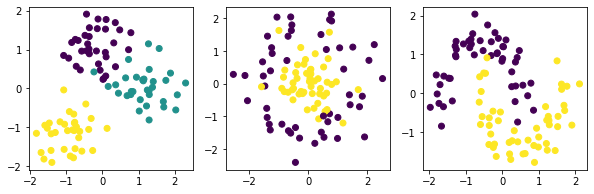

In [35]:
# стандартизация и печать
scaler        = StandardScaler()
X_blob_std    = scaler.fit_transform(X_blob)
X_circles_std = scaler.fit_transform(X_circles)
X_moons_std   = scaler.fit_transform(X_moons)

plt.figure(figsize=(10, 3))
plt.subplot(131)
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=y_blob)
plt.subplot(132)
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=y_circles)
plt.subplot(133)
plt.scatter(X_moons_std[:, 0], X_moons_std[:, 1], c=y_moons)
plt.show()

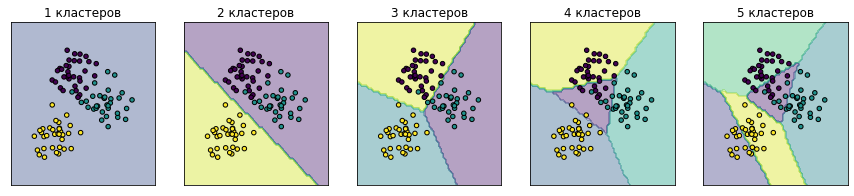

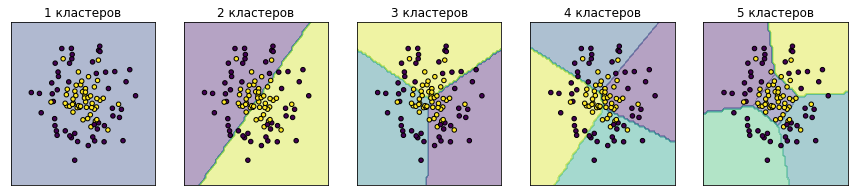

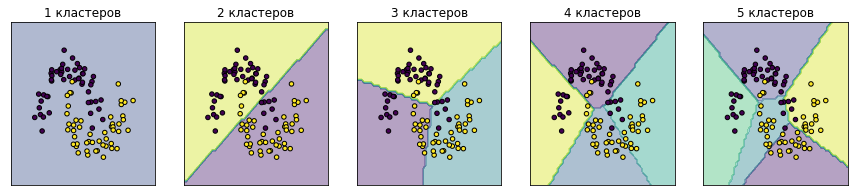

In [39]:
# кол-во соседей - от 1 до кол-ва всех точек в выборке
n_list = [1, 2, 3, 4, 5]
# обучение и печать результатов
for ind, data in enumerate([(X_blob_std, y_blob),
                            (X_circles_std, y_circles),
                            (X_moons_std, y_moons)]):
  # холст
  plt.figure(figsize=(15, 3))
  for ind_, n in enumerate(n_list):
    # обучение классификатора
    kmeans = KMeans(n_clusters=n,     # обучаем на кол-ве соседей из списка выше
                    random_state=42)   
    kmeans.fit(data[0], data[1])
    # печать
    # субплот 1 строка 5 колонок
    plt.subplot(1, 5, ind_+1)
    # настройка минимума и максимума для создания поля с точками
    x_min, x_max = data[0][:, 0].min()-1, data[0][:, 0].max()+1
    y_min, y_max = data[0][:, 1].min()-1, data[0][:, 1].max()+1
    # поле с точками для классификации с шагом 0,1 между точками
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    # предикты для этого поля
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # окраска поля по контуру классов из предикта
    plt.contourf(xx, yy, Z, alpha=0.4)
    # вывод оригинального датасета с истинными метками
    plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1],
                s=20,           # диаметр точек
                edgecolor='k')  # цвет окантовки точек
    plt.title(f'{n} кластеров')
    plt.xticks([])
    plt.yticks([])

plt.show()